# AI-IMAGE-CLASSIFIER

#### The primary goal of this project is to create an image classification model that can accurately identify whether an image is Real or generated by AI. This involves training a neural network on a diverse dataset of both real and AI-generated images, allowing the model to learn subtle differences and characteristics unique to each type.

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,BatchNormalization,Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Extracting the data
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/updated_zipfile.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
# Path to the directory containing the train and test data
DATADIR1 = r"/content/train"
DATADIR2 = r"/content/test"

In [5]:
# List of categories or classes for classification
Categories = ["FAKE", "REAL"]

In [6]:
# Initialize empty lists to store the training and testing data
training_data = []
testing_data = []
img_size = 64

In [7]:
# Function for data mining
def create_data_training(dire, t_data, img_size, Categories):
    for category in Categories:
        path = os.path.join(dire, category)
        class_num = Categories.index(category)
        i = 0
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)  # Use IMREAD_COLOR for RGB images
                new_array = cv2.resize(img_array, (img_size, img_size))
                t_data.append([new_array, class_num])
            except Exception as e:
                i += 1
                pass
        print(i, " Images not found ",path)   #Print count of unprocessed images

In [8]:
# Function for Creating Pickle file
def write_file(name, list):
    pickle_out = open(name, "wb")
    pickle.dump(list, pickle_out)
    pickle_out.close()


def read_file(name, list):
    pickle_in = open(name, "rb")
    list = pickle.load(pickle_in)

In [9]:
# Create and preprocess training data from both the directories
create_data_training(DATADIR1, training_data,64,Categories)
create_data_training(DATADIR2, testing_data,64,Categories)

4  Images not found  /content/train/FAKE
21  Images not found  /content/train/REAL
2  Images not found  /content/test/FAKE
7  Images not found  /content/test/REAL


In [10]:
# Shuffling the data
random.shuffle(training_data)
random.shuffle(testing_data)

In [12]:
# Creating empty lists to store the train and test data as required
X_train = []
y_train = []
X_test = []
y_test = []

In [13]:
# Separate features and labels for the train data and test data
for  features, label in training_data:
    X_train.append(features)
    y_train.append(label)

for  features, label in testing_data:
    X_test.append(features)
    y_test.append(label)


In [14]:
# Reshape X_train and X_test arrays to match the expected input shape for the model
X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

# Convert to a numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
print(y_test.shape, X_test.shape, X_train.shape, y_train.shape)

(20889,) (20889, 64, 64, 3) (102109, 64, 64, 3) (102109,)


In [16]:
# Function call for creating pickle files
write_file("X_train.pickle", X_train)
write_file("y_train.pickle", y_train)
write_file("X_test.pickle", X_test)
write_file("y_test.pickle", y_test)

read_file("X_train.pickle", X_train)
read_file("y_train.pickle", y_train)
read_file("X_test.pickle", X_test)
read_file("y_test.pickle",y_test)

In [17]:
# Spliting the validation data from training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## Model Architecture

##### Taking inspiration from principles found in popular models like VGG, ResNet, and DenseNet, we design this architecture with six convolution layers, three pooling layers, and four fully connected layers including output layer. We also use Batch Normalization and Dropout layers. In all the layers, we use the 'selu' activation function. The model is structured to handle 64x64 RGB images and output classification prediction with probability.

In [18]:
#model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='selu', input_shape=(64,64, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

# Convolutional Block 2
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='selu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

# Convolutional Block 3
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='selu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='selu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='selu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='selu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

#### For compiling we use 'adamax' optimazer and 'binary_crossentropy' as loss function. We also use early stopping to stop if 'val_loss' is not desreasing and model checkpoint to store the best weights after each epoch in the 'model.h5' file.

In [20]:
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose = 1)
model_checkpoint = ModelCheckpoint(
    filepath='/content/model.h5',  # Filepath to save the model
    monitor='val_loss',            # Metric to monitor
    save_best_only=True,           # Save only the best model
    verbose=1                      # Verbosity mode
)


In [21]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping , model_checkpoint])

Epoch 1/50
2553/2553 [==============================] - ETA: 0s - loss: 0.6399 - accuracy: 0.7656
Epoch 1: val_loss improved from inf to 0.25703, saving model to /content/model.h5
2553/2553 [==============================] - 74s 25ms/step - loss: 0.6399 - accuracy: 0.7656 - val_loss: 0.2570 - val_accuracy: 0.9020
Epoch 2/50
   1/2553 [..............................] - ETA: 1:04 - loss: 0.6587 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2552/2553 [============================>.] - ETA: 0s - loss: 0.2588 - accuracy: 0.8968
Epoch 2: val_loss improved from 0.25703 to 0.21826, saving model to /content/model.h5
2553/2553 [==============================] - 63s 25ms/step - loss: 0.2588 - accuracy: 0.8969 - val_loss: 0.2183 - val_accuracy: 0.9133
Epoch 3/50
2551/2553 [============================>.] - ETA: 0s - loss: 0.2027 - accuracy: 0.9200
Epoch 3: val_loss improved from 0.21826 to 0.19911, saving model to /content/model.h5
2553/2553 [==============================] - 63s 25ms/step - loss: 0.2026 - accuracy: 0.9200 - val_loss: 0.1991 - val_accuracy: 0.9193
Epoch 4/50
2551/2553 [============================>.] - ETA: 0s - loss: 0.1813 - accuracy: 0.9289
Epoch 4: val_loss improved from 0.19911 to 0.16082, saving model to /content/model.h5
2553/2553 [==============================] - 63s 25ms/step - loss: 0.1812 - accuracy: 0.9289 - val_loss: 0.1608 - val_accuracy: 0.9353
Epoch 5/50
2552/2553 [============================>.] 

##### Evaluate the model on the validation data

In [22]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model('/content/model.h5')
results = model.evaluate(X_val, y_val, verbose=1)

# Print the evaluation metrics
print(f'Test Loss: {results[0]}')
print(f'Test Accuracy: {results[1]}')

639/639 [==============================] - 4s 6ms/step - loss: 0.1153 - accuracy: 0.9608
Test Loss: 0.11532025784254074
Test Accuracy: 0.960826575756073


##### Evaluate the model on the test data

In [23]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model('/content/model.h5')
results = model.evaluate(X_test, y_test, verbose=1)

# Print the evaluation metrics
print(f'Test Loss: {results[0]}')
print(f'Test Accuracy: {results[1]}')

653/653 [==============================] - 5s 7ms/step - loss: 0.1269 - accuracy: 0.9563
Test Loss: 0.12688003480434418
Test Accuracy: 0.9563406705856323


#### Plotting epoch vs 'loss','val_loss'

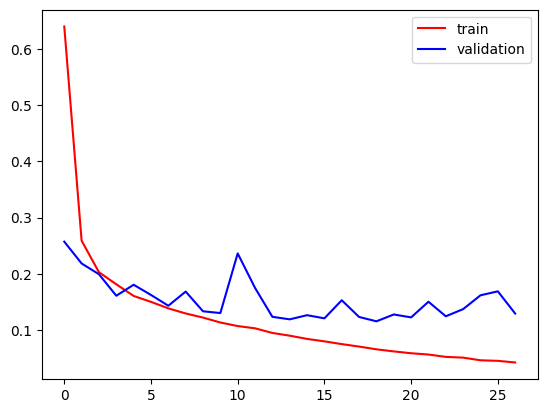

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

#### Plotting epoch vs 'accuracy', 'val_accuracy'

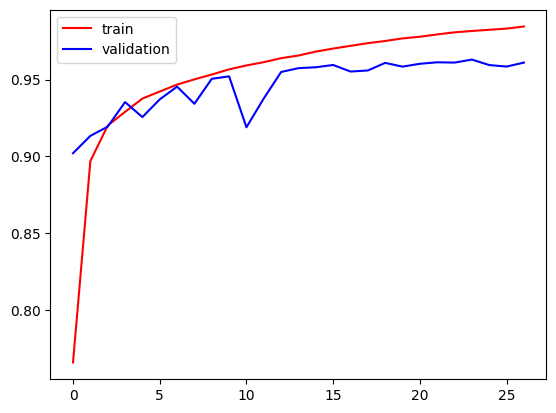

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation') 
plt.legend()
plt.show()